# Malaria Parasites Classification with fast.ai

Creating a simple classifier from the Malaria Parasites dataset,. available from the National Instituties of Health (NIH). The dataset can be found [here](https://ceb.nlm.nih.gov/repositories/malaria-datasets/). In this classification model, I am able to get ~ 96% accuracy. 

# Get Data

In [0]:
# image zip upload
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving malaria_5000_2c.zip to malaria_5000_2c.zip
User uploaded file "malaria_5000_2c.zip" with length 120795103 bytes


In [0]:
# csv upload
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving malaria_parasites_5000.csv to malaria_parasites_5000.csv
User uploaded file "malaria_parasites_5000.csv" with length 532878 bytes


In [0]:
!ls

malaria_5000_2c.zip  malaria_parasites_5000.csv  sample_data


In [0]:
!unzip -qq malaria_5000_2c.zip

In [0]:
!ls

malaria_5000_2c  malaria_5000_2c.zip  malaria_parasites_5000.csv  sample_data


In [0]:
!ls malaria_5000_2c | head

Parasitized
Uninfected


In [0]:
!rm malaria_5000_2c.zip

In [0]:
!ls

malaria_5000_2c  malaria_parasites_5000.csv  sample_data


In [0]:
!ls malaria_5000_2c

Parasitized  Uninfected


In [0]:
!ls malaria_5000_2c/Parasitized | head

C33P1thinF_IMG_20150619_114756a_cell_179.png
C33P1thinF_IMG_20150619_114756a_cell_180.png
C33P1thinF_IMG_20150619_114756a_cell_181.png
C33P1thinF_IMG_20150619_114756a_cell_182.png
C33P1thinF_IMG_20150619_115740a_cell_161.png
C33P1thinF_IMG_20150619_115740a_cell_162.png
C33P1thinF_IMG_20150619_115740a_cell_163.png
C33P1thinF_IMG_20150619_115808a_cell_205.png
C33P1thinF_IMG_20150619_115808a_cell_206.png
C33P1thinF_IMG_20150619_120645a_cell_215.png


# Imports and Installations

In [0]:
# fast ai installations
!pip install fastai
!pip install torchtext

    100% |████████████████████████████████| 153kB 6.8MB/s 
    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61982000 @  0x7fea9ea182a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 22.0MB/s 
    100% |████████████████████████████████| 112kB 29.1MB/s 
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built nvidia-ml-py3 bottleneck
torchvisio

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [0]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.0
True
True


#Path + Parameters

In [0]:
%cd ..

/


In [0]:
!ls

bin	    content  etc   lib32  mnt	root  srv    tmp    var
boot	    datalab  home  lib64  opt	run   swift  tools
colabtools  dev      lib   media  proc	sbin  sys    usr


In [0]:
PATH = Path("content/")
os.makedirs(PATH, exist_ok=True)

In [0]:
IMAGES = 'malaria_5000_2c'
IMG_PATH = Path("content/malaria_5000/")

In [0]:
!ls {PATH}

malaria_5000_2c  malaria_parasites_5000.csv  sample_data


# Model

In [0]:
# architechture
arch = models.resnet34

In [0]:
data = ImageDataBunch.from_folder(path=PATH, train=IMAGES, 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [0]:
# data = ImageDataBunch.from_csv(path=PATH, folder=IMAGES, csv_labels=labels, valid_pct=0.2, 
#                                ds_tfms=get_transforms(flip_vert=True, max_warp=0),
#                                size=224,bs=64,num_workers=0).normalize(imagenet_stats)

# data = ImageDataBunch.from_csv(`path`:PathOrStr, `folder`:PathOrStr=`'.'`, `sep`=`None`, `csv_labels`:PathOrStr=`'labels.csv'`, 
#                                `valid_pct`:float=`0.2`, `fn_col`:int=`0`, `label_col`:int=`1`, `suffix`:str=`''`, 
#                                `header`:Union[int, str, NoneType]=`'infer'`, `kwargs`:Any)


In [0]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['Parasitized', 'Uninfected']


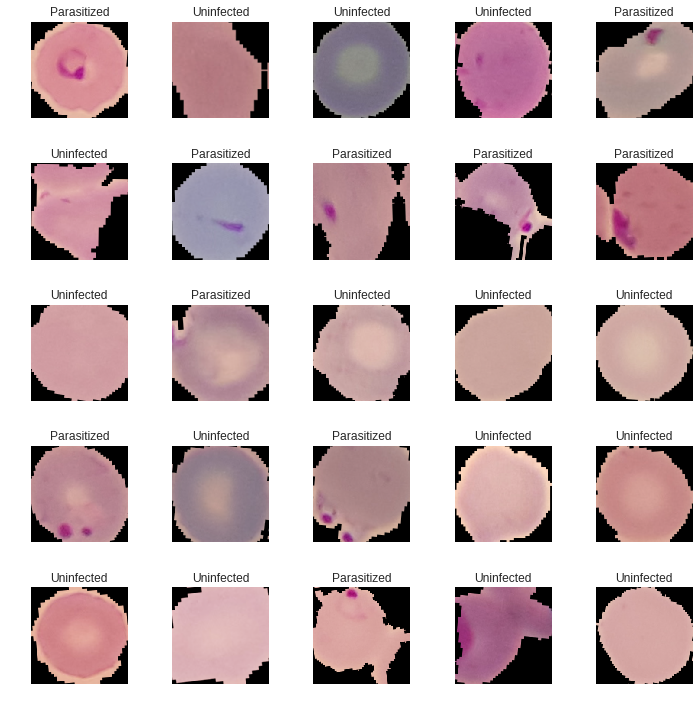

In [0]:
data.show_batch(rows=5, figsize=(10,10))

In [0]:
learn = create_cnn(data, arch, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 67690717.56it/s]


epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


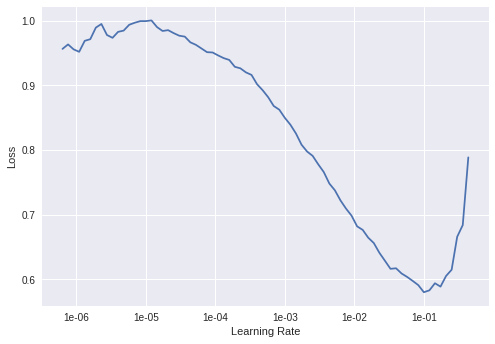

In [0]:
learn.lr_find()
learn.recorder.plot()

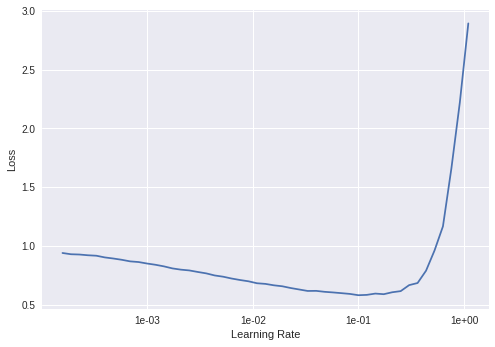

In [0]:
# fix chart to see relevant portion
learn.recorder.plot(skip_start=40, skip_end=0)

# old format
# learn.sched.plot(n_skip=0, n_skip_end=1)

In [0]:
learn.fit_one_cycle(6,1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.217087,0.168050,0.948500
2,0.186058,0.173507,0.945000
3,0.165082,0.191505,0.925500
4,0.156353,0.136692,0.958000
5,0.130869,0.109671,0.957500
6,0.121435,0.109779,0.958500


In [0]:
learn.save('stage_one')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


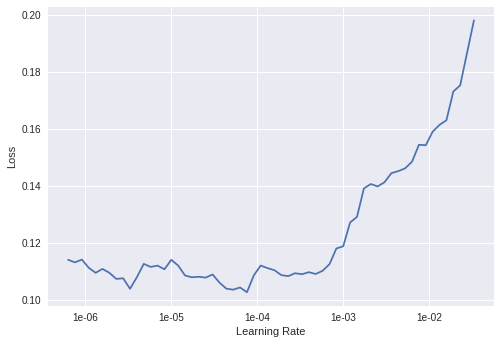

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(5e-6,5e-5 ))

epoch,train_loss,valid_loss,accuracy
1,0.120010,0.106681,0.960000
2,0.110182,0.103052,0.964000
3,0.095819,0.097673,0.963500
4,0.093052,0.098252,0.965500


In [0]:
learn.save('stage_two')

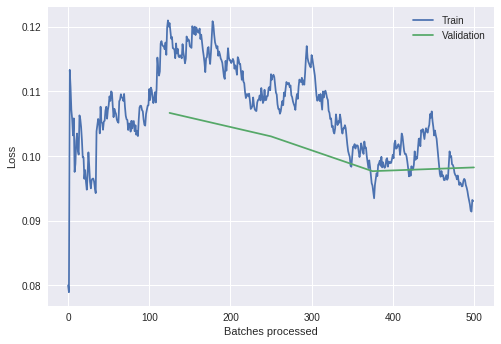

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

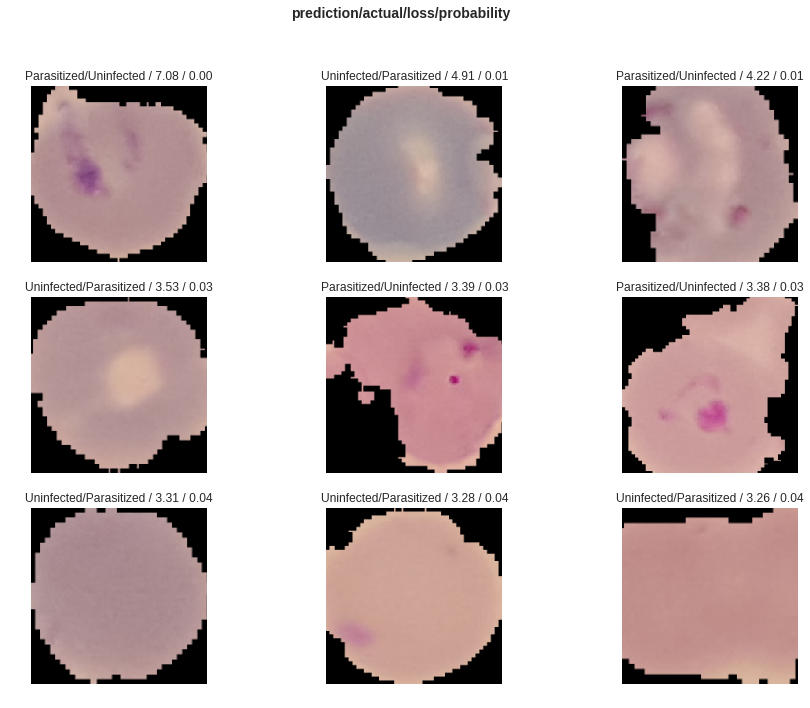

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

# Confusion Matrix

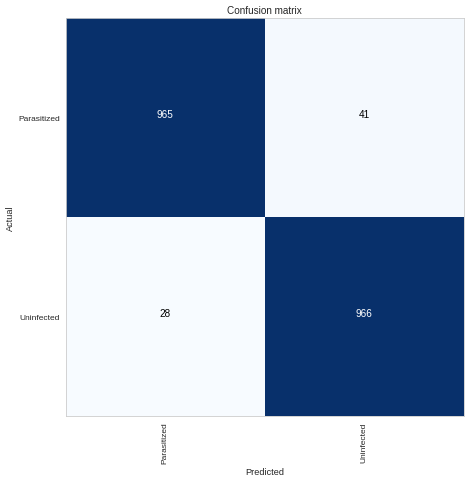

In [0]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 41), ('Uninfected', 'Parasitized', 28)]